- Identify the region and city with the highest sales.[link](#sales-with-region-and-city)
- Ship Mode's Impact on Profitability and Sales.[link](#ship-mode)
- Analyze the category and subcategory with the highest profit.[link](#profit-and-category-sub-category)
- Identify the segment with the highest profit and sales.[link](profit-and-segment)

In [ ]:
%pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)


1.23.5
1.5.3
0.12.2
3.7.0


## Data and imports
    

In [4]:
df = pd.read_csv("./data/Analysis of Super Store - DA.csv")

In [5]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Generating Null report

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.drop(columns=['Postal Code'],inplace=True)

#### see duplicates

In [10]:
df.duplicated().sum()

50

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

## Finding insights 


In [55]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Ship mode

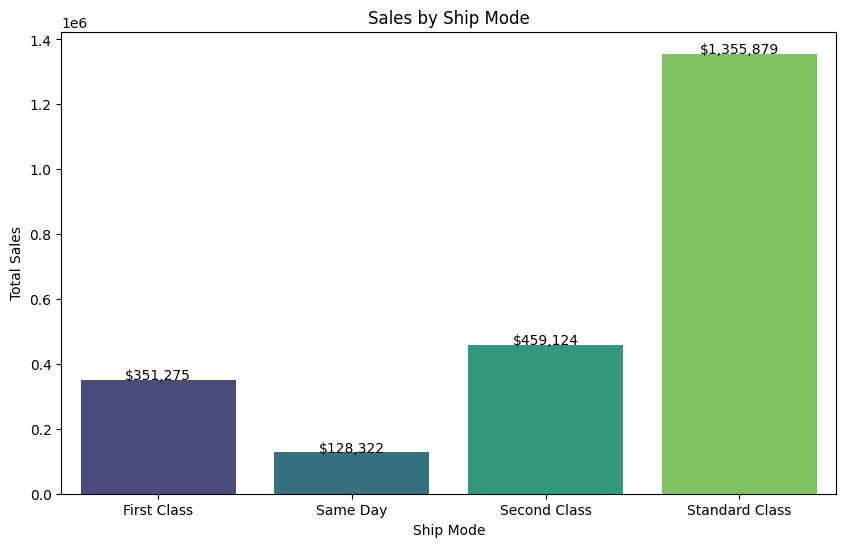

In [35]:
profit_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Ship Mode', y='Sales', data=profit_by_ship_mode, hue='Ship Mode',palette='viridis')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.title('Sales by Ship Mode')

# total profit as text on each bar
for i, v in enumerate(profit_by_ship_mode['Sales']):
    bar_plot.text(i, v + 50, f'${v:,.0f}', color='black', ha='center')

plt.show()


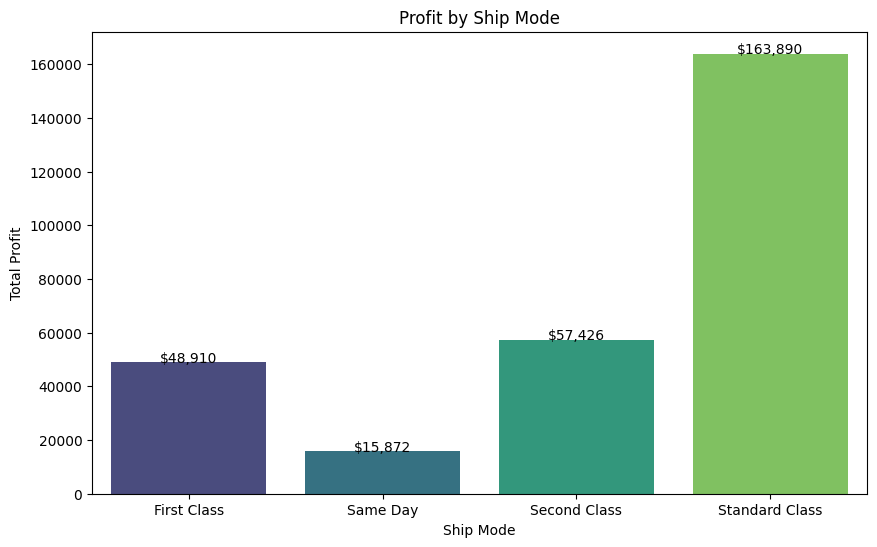

In [34]:
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Ship Mode', y='Profit', data=profit_by_ship_mode, hue='Ship Mode',palette='viridis')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.title('Profit by Ship Mode')

for i, v in enumerate(profit_by_ship_mode['Profit']):
    bar_plot.text(i, v + 50, f'${v:,.0f}', color='black', ha='center')

plt.show()


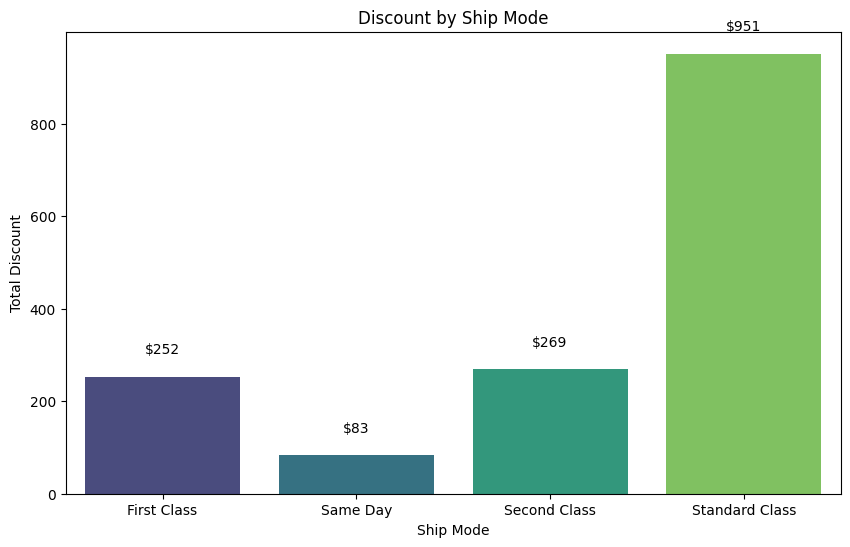

In [36]:
profit_by_ship_mode = df.groupby('Ship Mode')['Discount'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Ship Mode', y='Discount', data=profit_by_ship_mode, hue='Ship Mode',palette='viridis')
plt.xlabel('Ship Mode')
plt.ylabel('Total Discount')
plt.title('Discount by Ship Mode')

for i, v in enumerate(profit_by_ship_mode['Discount']):
    bar_plot.text(i, v + 50, f'${v:,.0f}', color='black', ha='center')

plt.show()


In [29]:
df['City'].nunique()

531

### Profit


#### Profit and city, 

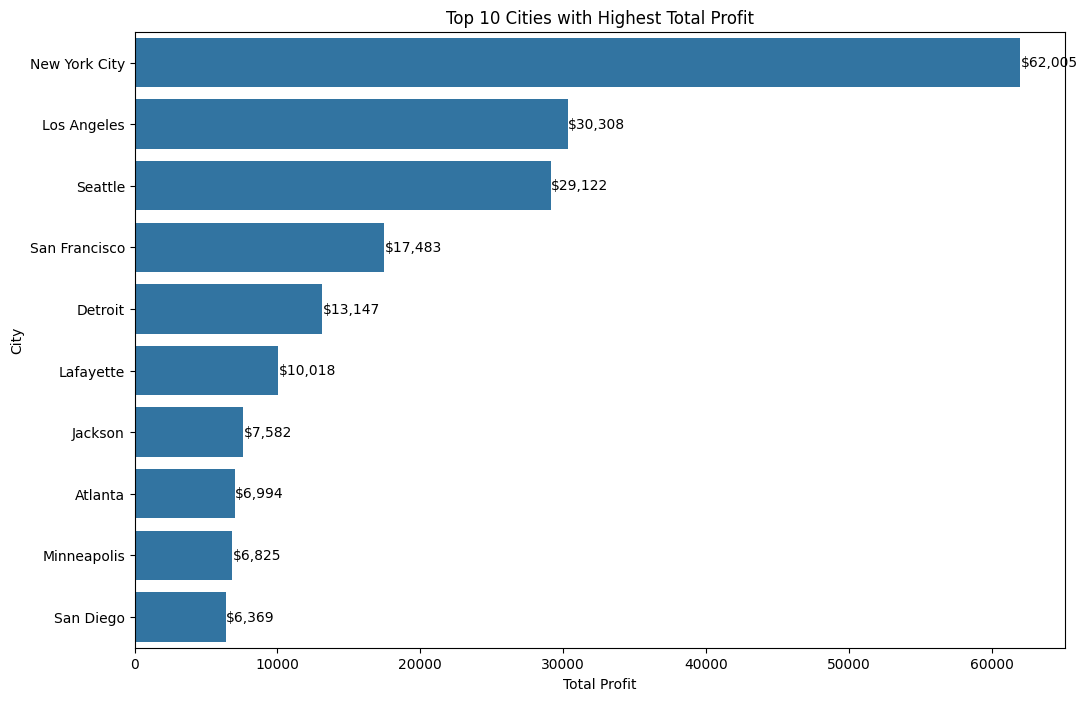

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

profit_by_city = df.groupby('City')['Profit'].sum().reset_index()

top_10_profit_cities = profit_by_city.nlargest(10, 'Profit')

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Profit', y='City', data=top_10_profit_cities, order=top_10_profit_cities['City'])
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Total Profit')

for i, v in enumerate(top_10_profit_cities['Profit']):
    bar_plot.text(v + 50, i, f'${v:,.0f}', color='black', va='center')

plt.show()


#### Profit and category, sub category

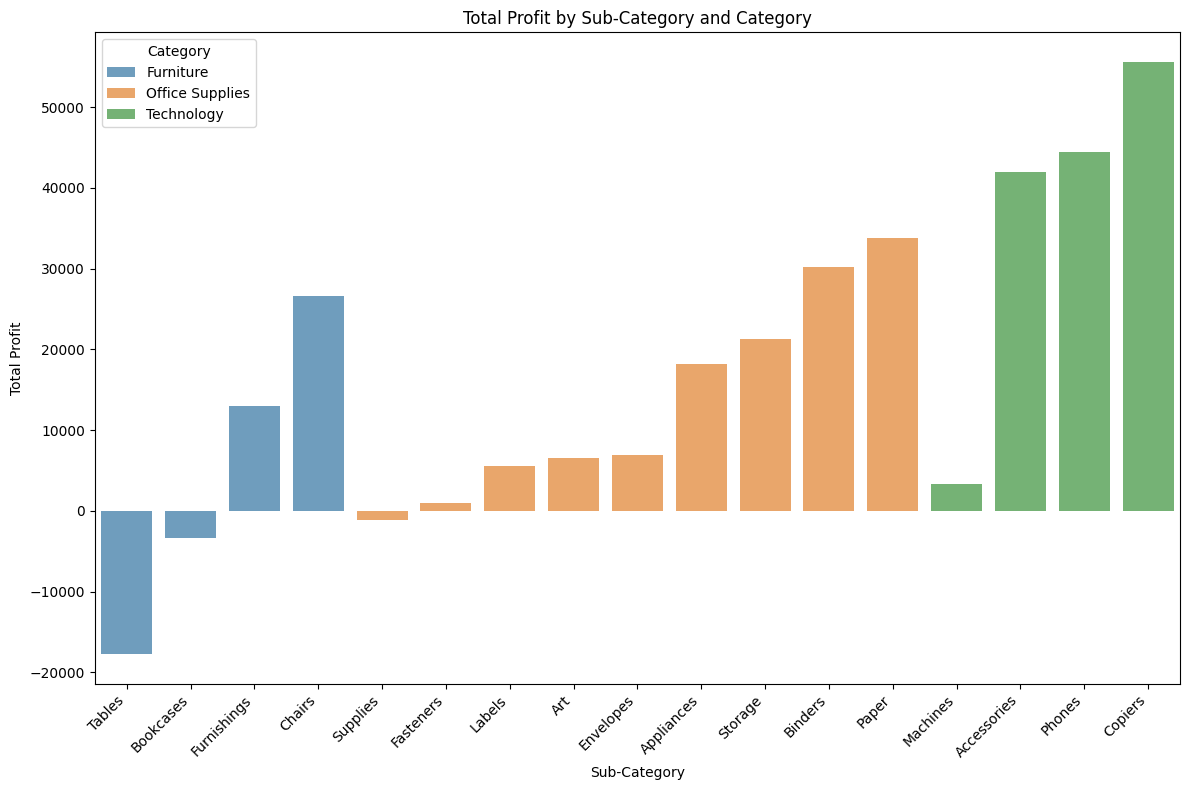

Category         Sub-Category
Furniture        Bookcases       -3398.7542
                 Chairs          26567.1278
                 Furnishings     13042.0534
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6511.8388
                 Binders         30205.2603
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5499.1558
                 Paper           33830.0381
                 Storage         21287.1788
                 Supplies        -1189.0995
Technology       Accessories     41920.9052
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44493.0524
Name: Profit, dtype: float64

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

profit_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

profit_by_category_subcategory_sorted = profit_by_category_subcategory.sort_values(by=['Category', 'Profit'], ascending=[True, True])

plt.figure(figsize=(12, 8))

sns.barplot(x='Sub-Category', y='Profit', hue='Category', data=profit_by_category_subcategory_sorted, dodge=False, alpha=0.7)
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sub-Category and Category')
plt.legend(title='Category',  )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
tt = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()
tt

#### Profit and segment


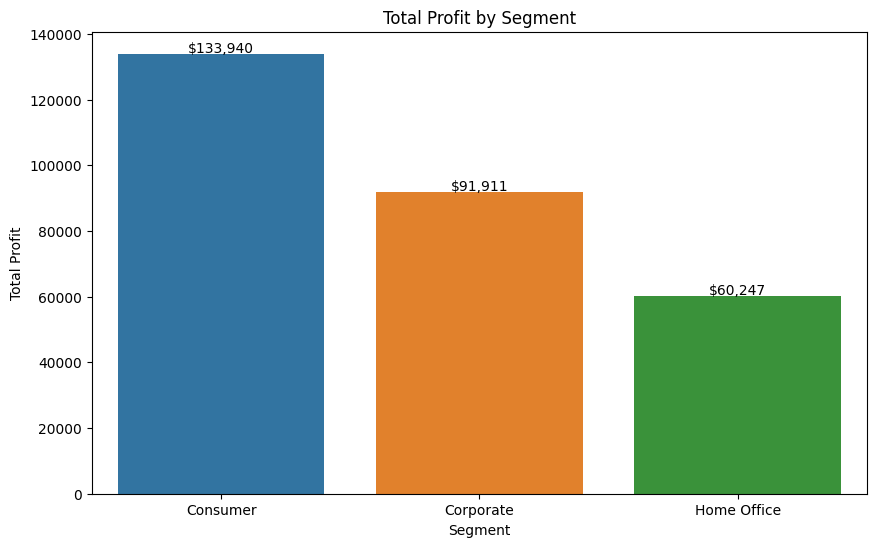

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Segment', y='Profit', hue='Segment', data=profit_by_segment, palette=colors, legend=False)
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')

for i, v in enumerate(profit_by_segment['Profit']):
    bar_plot.text(i, v + 500, f'${v:,.0f}', color='black', ha='center')

plt.show()


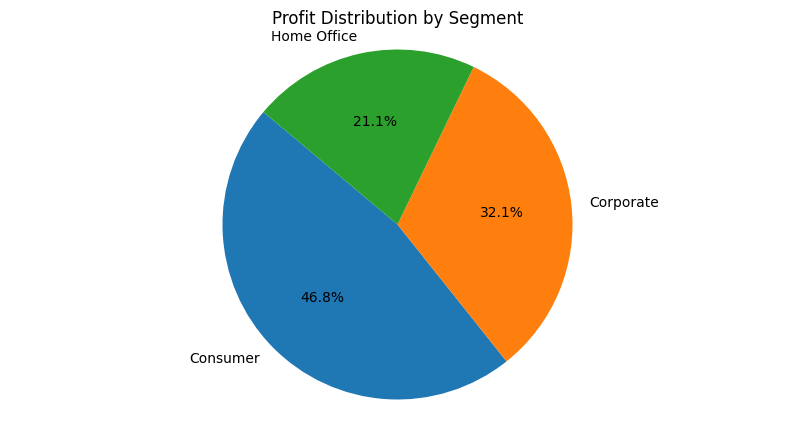

In [28]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.pie(profit_by_segment['Profit'], labels=profit_by_segment['Segment'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Profit Distribution by Segment')
plt.axis('equal')  
plt.show()

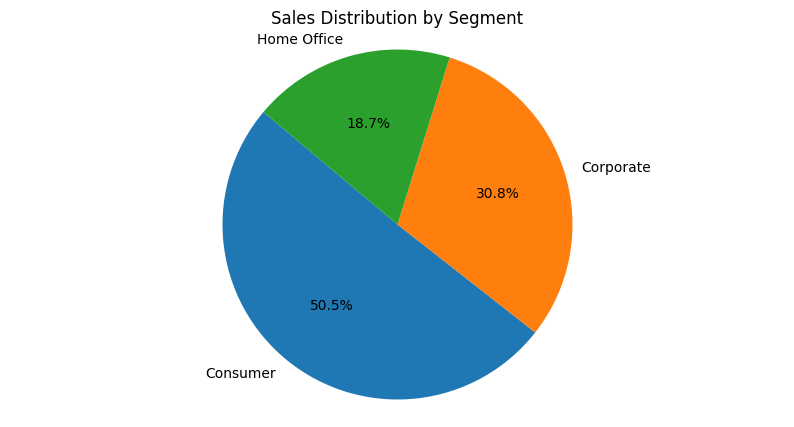

In [29]:
profit_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.pie(profit_by_segment['Sales'], labels=profit_by_segment['Segment'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Sales Distribution by Segment')
plt.axis('equal')  
plt.show()

### Quantity

#### Quantity and segment

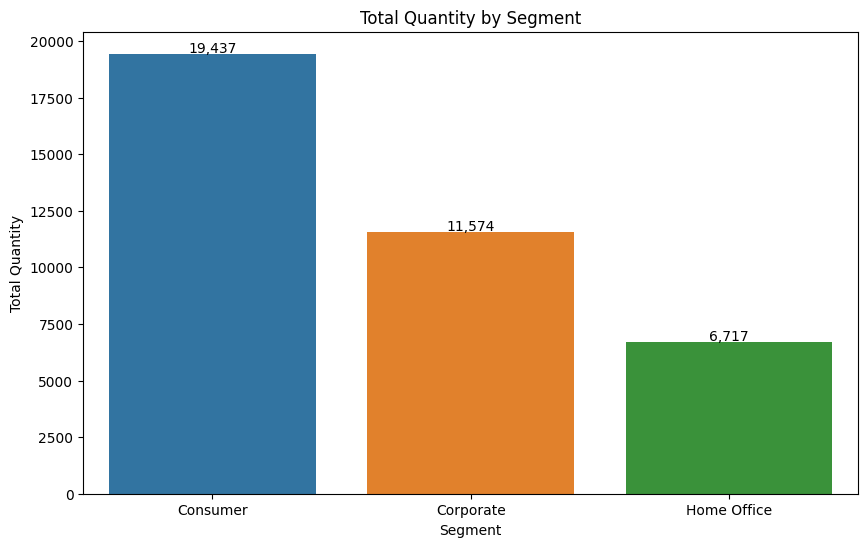

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

quantity_by_segment = df.groupby('Segment')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Segment', y='Quantity', hue='Segment', data=quantity_by_segment, palette=colors, dodge=False)
plt.xlabel('Segment')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Segment')

for i, v in enumerate(quantity_by_segment['Quantity']):
    bar_plot.text(i, v + 50, f'{v:,}', color='black', ha='center')

plt.show()


#### Quantity and state

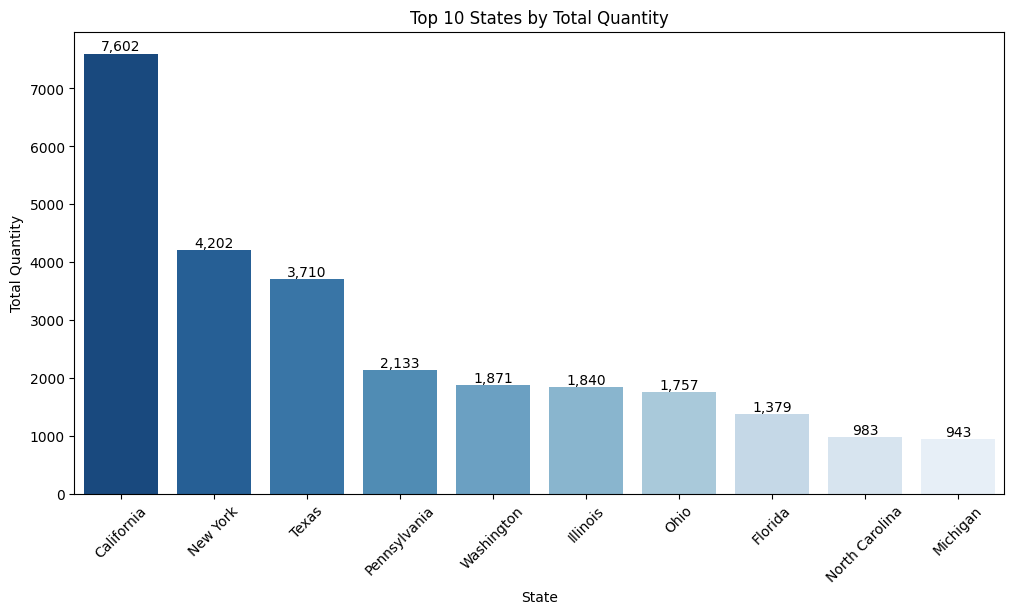

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

quantity_by_state = df.groupby('State')['Quantity'].sum().reset_index()

top_15_states = quantity_by_state.nlargest(10, 'Quantity')

colors = sns.color_palette("Blues_r", len(top_15_states))

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='State', y='Quantity', hue='State',legend=False,data=top_15_states, palette=colors)
plt.xlabel('State')
plt.ylabel('Total Quantity')
plt.title('Top 10 States by Total Quantity')

for i, v in enumerate(top_15_states['Quantity']):
    bar_plot.text(i, round(v,2) + 50, f'{round(v,2):,}', color='black', ha='center')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#### Quantity and city

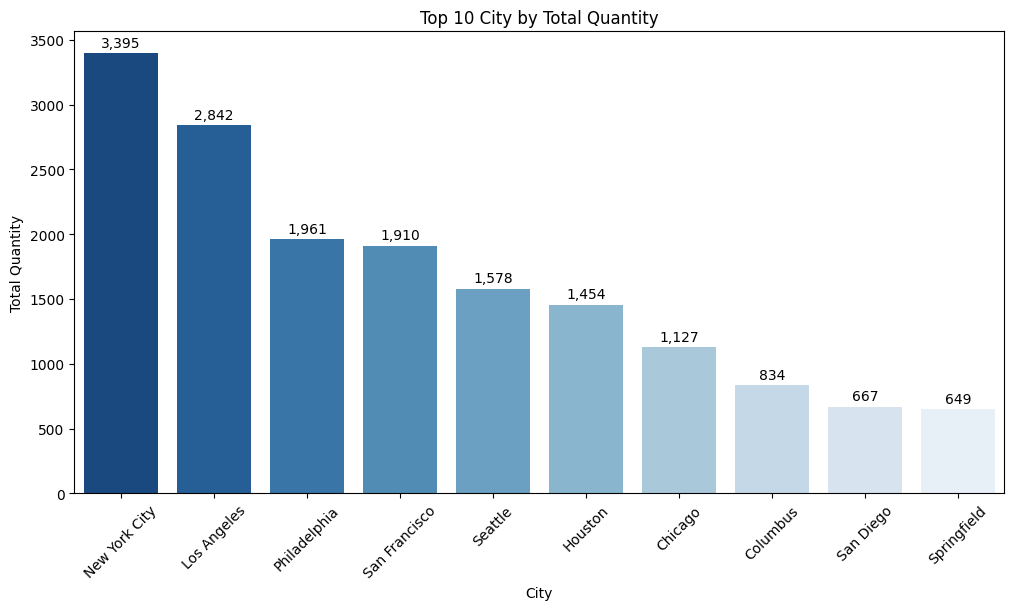

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

quantity_by_state = df.groupby('City')['Quantity'].sum().reset_index()

top_15_states = quantity_by_state.nlargest(10, 'Quantity')

colors = sns.color_palette("Blues_r", len(top_15_states))

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='City', y='Quantity', hue='City',legend=False,data=top_15_states, palette=colors)
plt.xlabel('City')
plt.ylabel('Total Quantity')
plt.title('Top 10 City by Total Quantity')

for i, v in enumerate(top_15_states['Quantity']):
    bar_plot.text(i, v + 50, f'{round(v,2):,}', color='black', ha='center')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Sales

#### Sales with region and city

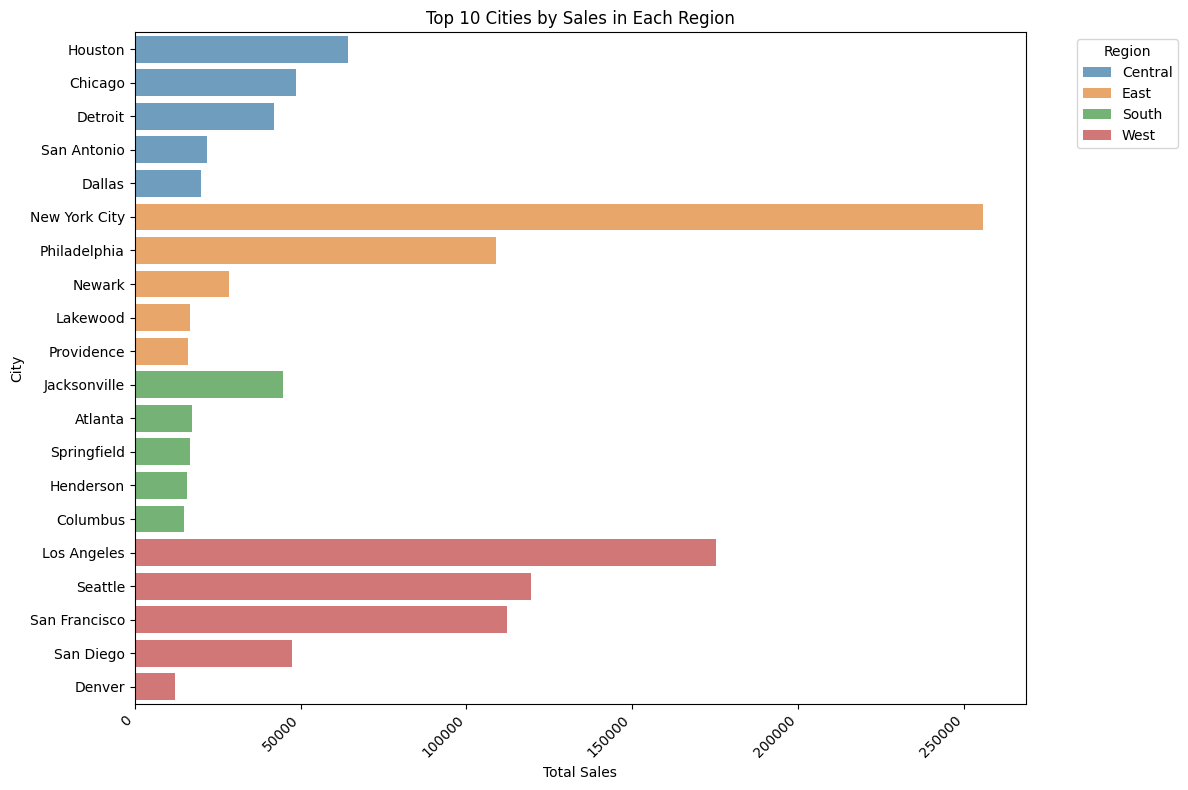

In [54]:
top_10_cities_by_region = df.groupby(['Region', 'City'])['Sales'].sum().groupby('Region', group_keys=False).nlargest(5)

top_10_cities_by_region = top_10_cities_by_region.reset_index()

top_10_cities_by_region_sorted = top_10_cities_by_region.sort_values(by=['Region', 'Sales'], ascending=[True, False])
plt.figure(figsize=(12, 8))
sns.barplot(y='City', x='Sales', hue='Region', data=top_10_cities_by_region_sorted, dodge=False, alpha=0.7, hue_order=top_10_cities_by_region_sorted['Region'].unique())
plt.ylabel('City')
plt.xlabel('Total Sales')
plt.title('Top 10 Cities by Sales in Each Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()